In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
#loading the dataset
#loaded dataset returns training and testing images
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [3]:
#returns the second image in the training dataset in three dimensional view
X_train_digit[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [4]:
#displays the digits to be classified
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [5]:
y_test_digit[1]

2

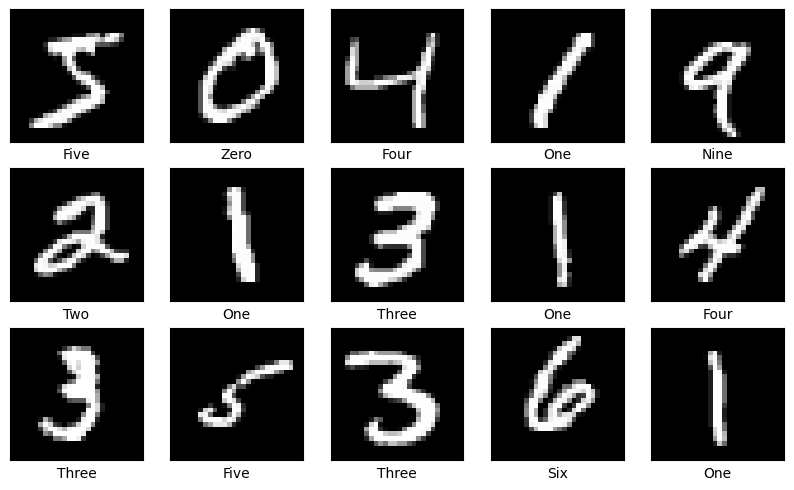

In [8]:
#assigning names to each digits in the dataset
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
# looping over first 15 digits in the dataset
for i in range(15):
    #organize the digits into subplots in a 5x5 grid.
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #show the digit image in each subplot
    plt.imshow(X_train_digit[i], cmap='gray')
    #label at the bottom of each subplot showing which digit it represents.
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [9]:
#shape of the training dataset-3D view
X_train_digit.shape

(60000, 28, 28)

In [10]:
y_train_digit.shape

(60000,)

In [11]:
X_test_digit.shape

(10000, 28, 28)

In [12]:
y_test_digit.shape

(10000,)

# Preprocessing the input- Converting three dimension to two dimension

In [13]:
#ANN works for two dimensional dataset
#converting training and testing input data to 2D format
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [14]:
X_test_digit

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [16]:
#Encoding Digit MNIST Labels
#ANN output shape should be in one hot encoding format
#converting the output digits into one hot encoding format
y_train_digit = to_categorical(y_train_digit, num_classes=10)
y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [17]:
y_train_digit

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# 1. Brain Creation

In [18]:
#Creating base neural network
#sequential - next layers (one by one)
#784 neurons connected with next hidden layer with activation func 'relu' - checks whether the neuron holds valid information
#last layer is the output layer which has 10 neurons and a sigmoid function which gives the output between 0 and 1
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [19]:
#summary of the base network
#parameter= output channel number* (input channel number+1)
#784 neurons - 256 neurons(hidden layer1) |256*(784+1)=200960
#256 neurons - 64 neurons(hidden layer2)|64*(256+1)=16448
#64 neurons - 64 neurons(hidden layer3)|64*(64+1)=4160
#64 neurons - 10 neurons(output layer)|10*(64+1)=650
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


# 2. Compilation

In [20]:
#Compiling the model
#checks the difference between actual and the predicted value
#optimizer algorithm that adjusts the weights of the network to minimize the loss function
#metrics are used to validate the performance of the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

# 3. Fit the model

In [21]:
#the training is done based on the given training input and output images
#batch_size represents the number of samples used in each iteration of training
#epochs represent the number of times the entire dataset(feed forward and Back propagation) is passed through the algorithm. 
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 20s 24ms/step - loss: 1.5345 - accuracy: 0.8669 - val_loss: 0.4206 - val_accuracy: 0.9169
Epoch 2/10
600/600 [==============================] - 13s 22ms/step - loss: 0.2481 - accuracy: 0.9395 - val_loss: 0.2475 - val_accuracy: 0.9434
Epoch 3/10
600/600 [==============================] - 10s 17ms/step - loss: 0.1580 - accuracy: 0.9568 - val_loss: 0.2105 - val_accuracy: 0.9508
Epoch 4/10
600/600 [==============================] - 9s 15ms/step - loss: 0.1213 - accuracy: 0.9648 - val_loss: 0.1808 - val_accuracy: 0.9545
Epoch 5/10
600/600 [==============================] - 11s 18ms/step - loss: 0.1014 - accuracy: 0.9706 - val_loss: 0.1816 - val_accuracy: 0.9556
Epoch 6/10
600/600 [==============================] - 8s 13ms/step - loss: 0.0963 - accuracy: 0.9709 - val_loss: 0.1766 - val_accuracy: 0.9564
Epoch 7/10
600/600 [==============================] - 7s 12ms/step - loss: 0.0859 - accuracy: 0.9748 - val_loss: 0.1699 - val_accuracy: 0.

In [22]:
#Predicting the digits
y_predict = model.predict(X_test_digit)

313/313 [==============================] - 3s 8ms/step


In [24]:
#shows the highest probability of each image
#It is difficult to find the exact number
y_predict[1]

array([9.9933982e-01, 1.0000000e+00, 1.0000000e+00, 9.9999869e-01,
       2.0164516e-02, 9.4829541e-01, 9.9909407e-01, 9.9969816e-01,
       9.9998337e-01, 6.1659300e-04], dtype=float32)

In [26]:
#predicted test set data is passed to the argmax() function which returns the maximum value 
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector


In [35]:
#exact number is returned
y_predicts[3]

0

In [ ]:
#test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)

In [28]:
#actual test set data is passed to the argmax() function
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [29]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [30]:
#converting y_predicts values into a dataframe
y_pre=pd.DataFrame(y_predicts)

In [31]:
y_pre

,0
0,3
1,1
2,1
3,0
4,4
...,...
9995,1
9996,3
9997,4
9998,5


In [36]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8996\924251084.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


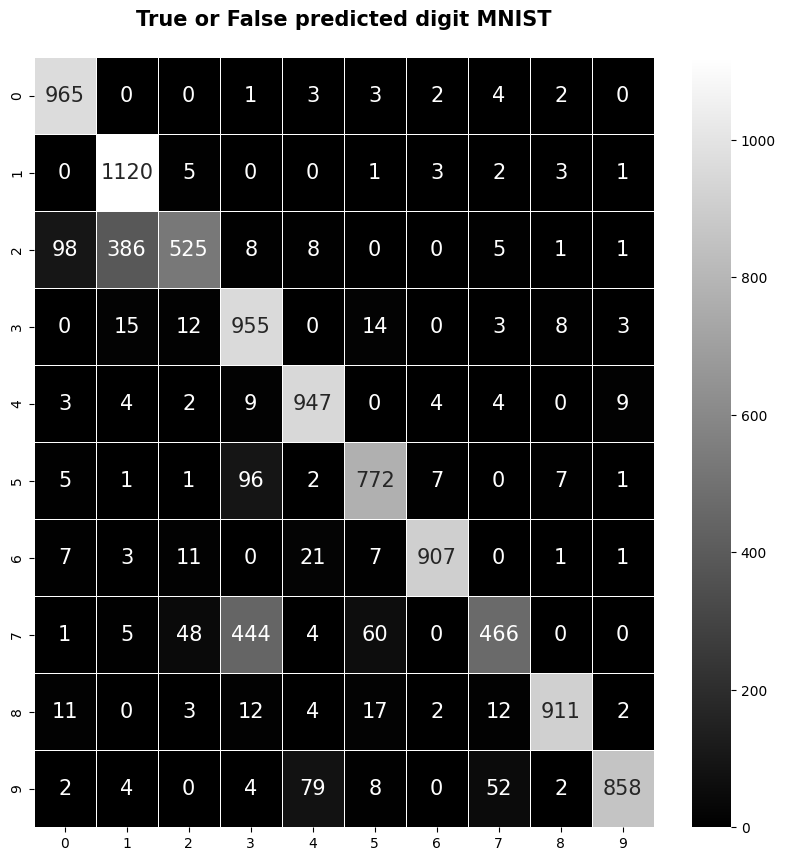

In [37]:
#Confusion matrix for Digit MNIST
#confusion matrix for actual and predicted data
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
#heat map highlights the correctly and wrongly classified data
#the values in the diagonal line are correctly classified 
#annot means annotation - adding labels to each cell of the heatmap with fontsize=15, gray color map,fmt specifies the type of annotation
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [38]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       980
           1       0.73      0.99      0.84      1135
           2       0.86      0.51      0.64      1032
           3       0.62      0.95      0.75      1010
           4       0.89      0.96      0.92       982
           5       0.88      0.87      0.87       892
           6       0.98      0.95      0.96       958
           7       0.85      0.45      0.59      1028
           8       0.97      0.94      0.95       974
           9       0.98      0.85      0.91      1009

    accuracy                           0.84     10000
   macro avg       0.86      0.84      0.84     10000
weighted avg       0.86      0.84      0.83     10000



# if the accuracy is not good,hypertune the parameters to get the best result(accuracy)

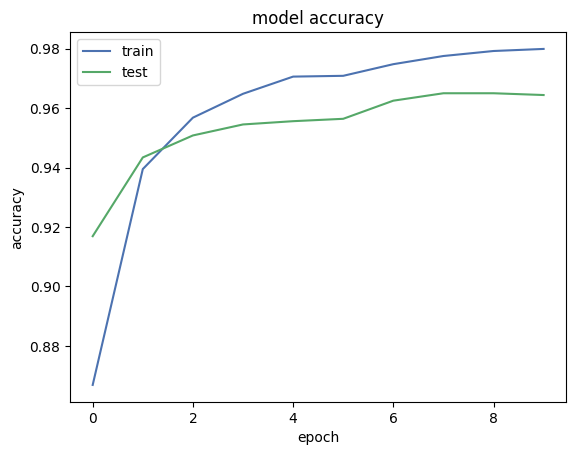

In [39]:
#Graph for model accuracy between epoch and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

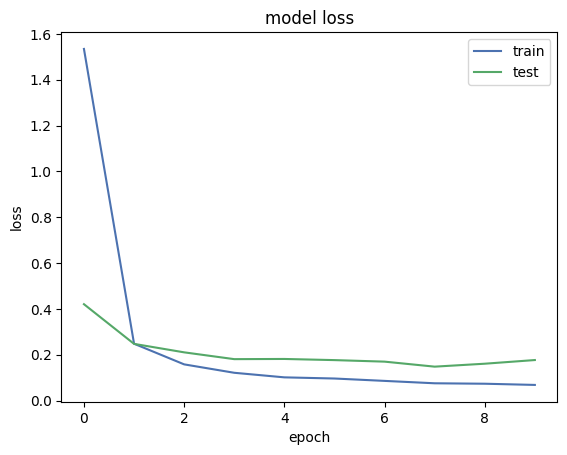

In [40]:
#graph for model loss between epoch and loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [41]:
#predicting a single image to deploy to the end users
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) #represents the predicted class label for the image
y_test_digit_eval=np.argmax(y_test_digit, axis=1) #converts one-hot encoded labels into their corresponding class indices.

1/1 [==============================] - 0s 137ms/step


In [42]:
y_predicts_single[0]

1

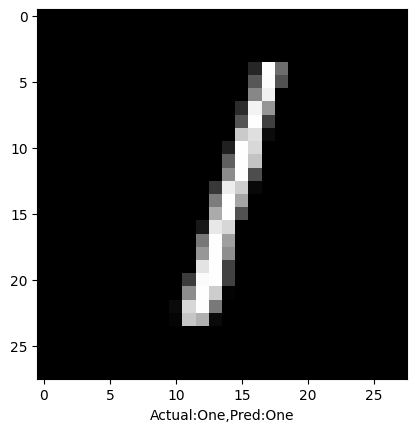

In [43]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray') # reshapes the 1D array of pixel values into a 28x28 grid and shows the number
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]])) # It includes the actual label and the predicted label for the third digit
plt.show()

In [44]:
y_test_digit[7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)